EigenFaces - In this problem, we would like to apply PCA to images of faces.
The Labeled Faces in the Wild (LFW) face recognition dataset contains face images of
5749 famous people collected over the internet. Each image is of size 62 ×47 pixels.
You can download this dataset by calling the function
sklearn.datasets.fetch_lfw_people(min_faces_per_person=50)

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

In [78]:
sklearn.__version__

'1.0.2'

Load the data and display a few faces to make sure you understand the data format.

In [79]:
face_data=fetch_lfw_people(min_faces_per_person=50)

In [80]:
face_data.data.shape

(1560, 2914)

In [81]:
face_data.images.shape

(1560, 62, 47)

In [82]:
face_data.images

array([[[ 81.333336,  86.      , 102.      , ...,  57.      ,
          69.      ,  77.      ],
        [ 86.666664,  90.      , 102.      , ...,  43.666668,
          58.333332,  76.333336],
        [ 92.      ,  96.      ,  94.333336, ...,  46.      ,
          49.      ,  63.333332],
        ...,
        [ 47.666668,  47.      ,  45.      , ..., 163.33333 ,
         115.333336,  85.      ],
        [ 48.      ,  48.333332,  46.333332, ..., 146.66667 ,
         137.      , 102.666664],
        [ 47.666668,  47.333332,  46.      , ..., 134.      ,
         149.66667 , 120.      ]],

       [[ 33.333332,  58.      ,  80.      , ...,  48.      ,
          44.      ,  40.666668],
        [ 40.      ,  67.666664,  85.      , ...,  58.333332,
          53.333332,  48.333332],
        [ 46.      ,  73.333336,  86.666664, ...,  68.      ,
          60.333332,  54.333332],
        ...,
        [ 10.      ,  33.      , 105.333336, ..., 188.33333 ,
         182.      , 178.      ],
        [  9

In [83]:
n_samples, h, w = face_data.images.shape

X = face_data.data
n_features = X.shape[1]

y = face_data.target
target_names = face_data.target_names
n_classes = target_names.shape[0]

Display the first 10 principal components of the data. These should be vectors of length 62 ×47 = 2914, so you can reshape them and view them as face images just like the
original data. These types of images are often called ”eigenfaces”.

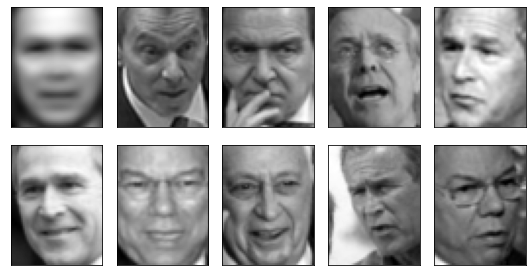

In [84]:
def plot_faces(images, n_row=2, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
    plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()
    
Xmean = np.mean(X,axis=0).reshape(1,n_features)
plot_faces(np.concatenate((Xmean,X[:9]),axis=0))

Plot the cumulative variance explained by the principal components as a function of the number of components.

In [85]:
pca = PCA(n_components=10).fit(X)
pca.components_.shape

(10, 2914)

In [86]:
eigen_faces=pca.components_

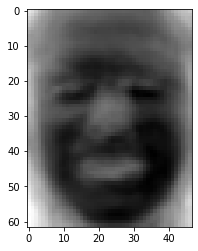

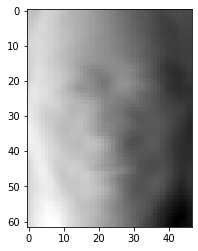

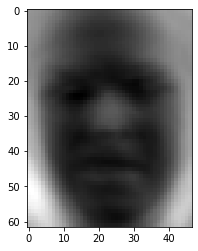

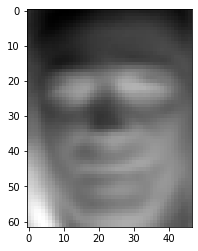

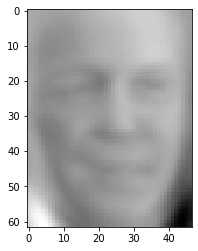

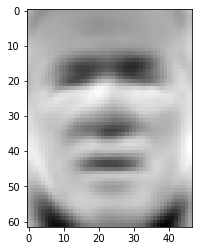

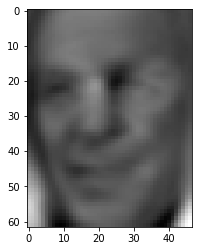

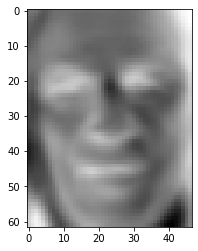

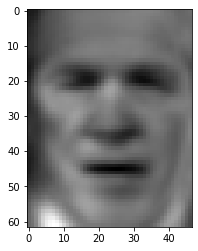

In [87]:
# Change value of i (0,9) and re-run this cell to get the value to view the corresponding eigenface
for i in range(0,9):
    plt.imshow(eigen_faces[i].reshape((62,47)),cmap=plt.cm.gray)
    plt.show()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [89]:
pca = PCA().fit(X)

In [90]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.21341549, 0.35057712, 0.42184818, ..., 0.9999996 , 0.9999997 ,
       0.9999997 ], dtype=float32)

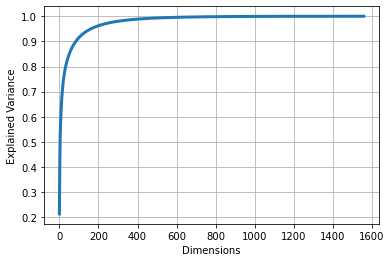

In [91]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

How many principal components are needed to retain 95% of the variance?

In [92]:
d = np.argmax(cumsum >= 0.95) + 1
d

163

Choose any 3 faces and reconstruct them using the first k principal components, for k = 5,10,50,100.

In [93]:
def plot_fun(images,titles, rows,columns):
    fig=plt.figure(figsize=(10,7))
    fig.add_subplot(rows,columns,1)
    plt.imshow(images[0].reshape(62,47),interpolation='nearest',cmap='gray')
    plt.axis('off')
    plt.title(titles[0])
    for i in range(1,len(images)):
        fig.add_subplot(rows,columns,i+1)
        plt.imshow(images[i].reshape(62,47),interpolation='nearest',cmap='gray')
        plt.axis('off')
        plt.title(titles[i])

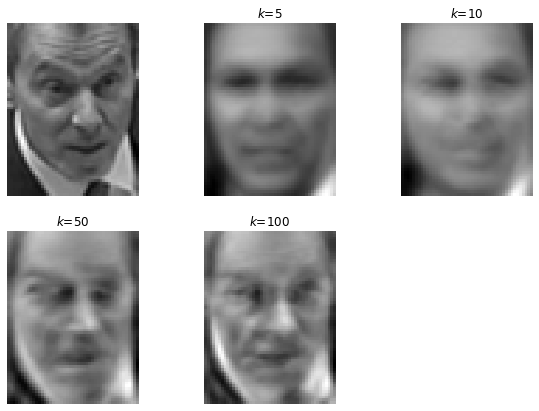

In [94]:
images=[]
titles=['']
images.append(X[0])
K=[5,10,50,100]
for i in K:
    pca=PCA(n_components=i)
    X_reduced=pca.fit_transform(X)
    X_recovered=pca.inverse_transform(X_reduced)
    images.append(X_recovered[0])
    titles.append(f'$k$={i}')
    
plot_fun(images, titles,2,3)

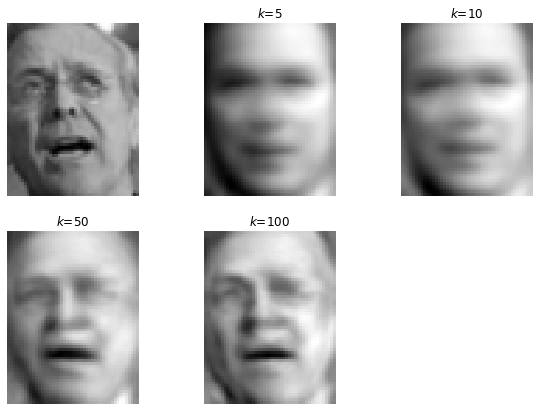

In [95]:
images=[]
titles=['']
images.append(X[2])
K=[5,10,50,100]
for i in K:
    pca=PCA(n_components=i)
    X_reduced=pca.fit_transform(X)
    X_recovered=pca.inverse_transform(X_reduced)
    images.append(X_recovered[2])
    titles.append(f'$k$={i}')
    
plot_fun(images, titles,2,3)

In [96]:
images

[array([ 88.666664,  66.      ,  53.333332, ..., 132.33333 ,  59.666668,
         81.      ], dtype=float32),
 array([ 64.68223,  67.41504,  71.51828, ..., 161.72078, 155.47   ,
        150.46411], dtype=float32),
 array([ 63.569458,  65.360596,  68.63578 , ..., 169.6917  , 165.43674 ,
        161.228   ], dtype=float32),
 array([ 51.810295,  55.432693,  63.175964, ..., 140.00732 , 123.54169 ,
        120.40181 ], dtype=float32),
 array([ 64.58099,  64.74399,  67.15375, ..., 136.7479 , 114.40009,
        108.65341], dtype=float32)]

In [97]:
pca=PCA(n_components=0.95)
x_reduced=pca.fit_transform(X)

In [98]:
x_reduced.shape

(1560, 163)

Train a classifier on the images after reducing them to the number of dimensions you have found in part (4) (you may choose any classifier to your liking). How does the classification result compare to the classification on the original images?

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
classifier=GaussianNB().fit(X_train, y_train)
predictions= classifier.predict(X_test)

In [101]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.15      0.25      0.19        16
           1       0.54      0.38      0.45        66
           2       0.46      0.22      0.30        27
           3       0.85      0.36      0.51       140
           4       0.50      0.12      0.20        24
           5       0.13      0.29      0.18        17
           6       0.04      0.10      0.05        10
           7       0.16      0.71      0.26        14
           8       0.33      0.69      0.45        16
           9       0.13      0.36      0.19        11
          10       0.32      0.89      0.47         9
          11       0.70      0.35      0.47        40

    accuracy                           0.36       390
   macro avg       0.36      0.39      0.31       390
weighted avg       0.57      0.36      0.40       390



In [102]:
X_train, X_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.25, random_state=42)

In [105]:
classifier=GaussianNB().fit(X_train, y_train)
predictions=classifier.predict(X_test)

In [106]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        16
           1       0.78      0.71      0.75        66
           2       0.67      0.44      0.53        27
           3       0.70      0.79      0.74       140
           4       0.85      0.46      0.59        24
           5       0.90      0.53      0.67        17
           6       0.50      0.50      0.50        10
           7       0.54      0.50      0.52        14
           8       1.00      0.75      0.86        16
           9       0.89      0.73      0.80        11
          10       0.19      0.78      0.30         9
          11       0.73      0.60      0.66        40

    accuracy                           0.67       390
   macro avg       0.69      0.61      0.62       390
weighted avg       0.72      0.67      0.68       390



As we can notice that the classification results have improved a lot with the reduced dimensions with the Naive Bayes Classifier. It is evident that the overall precision, recall, f1-score improves because of reduced dimensions, the increment in performance depends on many other factors like classifier, fine tuning the model etc.